In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
chars="abcdefghijklmnopqrstuvwxyz0123456789 -,;.!?:'\"/\|_@#$%ˆ&*˜‘+-=()[]{}<>"


In [0]:

df = pd.read_csv('drive/My Drive/data.tar.gz', compression='gzip')
df.tail()

,data.csv,line,is_code
13166904,java,b'import org.springframework.boot.autoconfigur...,1.0
13166905,java,b'import org.springframework.boot.test.autocon...,1.0
13166906,java,b'@springbootapplication',1.0
13166907,java,b'public class examplewebfluxapplication {',1.0
13166908,NaN,NaN,NaN


In [0]:
df.drop(index=13166908)

,data.csv,line,is_code
0,ts,b'tslint:disable:max-line-length',0.0
1,ts,b'@deprecated deprecated in favor of static co...,0.0
2,ts,b'@deprecated deprecated in favor of static co...,0.0
3,ts,b'@deprecated deprecated in favor of static co...,0.0
4,ts,b'@deprecated deprecated in favor of static co...,0.0
5,ts,b'@deprecated deprecated in favor of static co...,0.0
6,ts,b'@deprecated deprecated in favor of static co...,0.0
7,ts,b'@deprecated deprecated in favor of static co...,0.0
8,ts,b'@deprecated deprecated in favor of static co...,0.0
9,ts,b'@deprecated deprecated in favor of static co...,0.0


In [0]:
VAL_SIZE = 0.2

idx = list(df.index)

np.random.shuffle(idx)

train_idx = idx[int(VAL_SIZE*len(idx)):]
val_idx = idx[:int(VAL_SIZE*len(idx))]

train = df.loc[train_idx, :]
val = df.loc[val_idx, :]
train.head()

,data.csv,line,is_code
9975770,java,"b'bigtens[] = { 1e16, 1e32, 1e64, 1e128, 1e256...",1.0
5026466,java,"b'xmlvm_enter_method(""org.apache.harmony.luni....",1.0
6832522,java,"b'end = getnextbaseoffset(text, end, strsrch->...",1.0
3148306,java,"b'const checktypes = process.env[""node_env""] !...",1.0
8530647,java,b'if (path >= basename) return_node_and_errno(...,1.0


In [0]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

In [0]:


max_len = 200
def transform_sentences(df2):
  X_char = []
  for sentence in df2['line']:
    sentence =  sentence[2:-1].lower()
    sent_seq = []
    for i in range(max_len):
      try:
        value = char2idx.get(sentence[i])
        if value == None:
          sent_seq.append(char2idx["UNK"])
        else:
          sent_seq.append(value)
      except:
        sent_seq.append(char2idx.get("PAD"))
    X_char.append(np.array(sent_seq))
  X_char = pad_sequences(maxlen=max_len, sequences=X_char, value=char2idx["PAD"], padding='post', truncating='post')
  #print(X_char[:5])
  return X_char

In [0]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras.layers import Bidirectional
from keras.callbacks import ModelCheckpoint

In [0]:
char_in = Input(shape=(max_len,))
emb_char = Embedding(input_dim=len(chars) + 2, output_dim=16,
                           input_length=max_len, mask_zero=True)(char_in)
main_lstm = LSTM(units=100, return_sequences=False,
                               recurrent_dropout=0.8)(emb_char)
out = (Dense(8,input_shape=(16,), activation='relu'))(main_lstm)
out = Dropout(0.2)(out)
out = (Dense(1, activation='sigmoid'))(out)
model = Model( char_in, out)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 32)           2304      
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 808       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)      

In [0]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])


In [0]:
eval = []
for i in range(20):
  print(i)
  filepath="drive/My Drive/separatecode_sample"+str(i)+"-{epoch:02d}-{loss:.4f}.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]
  df2 = train.sample(n=100000)
  X = transform_sentences(df2)
  X_train,X_test = X[:80000],X[80000:]
  model.fit(X_train, df2[:80000]['is_code'], epochs=10, batch_size=1024, validation_split=0.2, callbacks=callbacks_list)
  
  p = model.evaluate(X_test,df2[80000:]['is_code'])
  eval.append(p)
  print(p)

[[ 3 19  6  2 12 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]
 [17 22  3 13 10  4 38 23 16 10  5 38  8  6 21 23  6  9 10  4 13  6  5  6
  21  2 10 13 20 24  9  6 15 22 20  6 19 15  2 14  6 10 20 15 22 13 13 20
   9 16 22 13  5 21  9 19 16 24  6 25  4  6 17 21 10 16 15 64 65 38 68  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 

KeyboardInterrupt: ignored

In [0]:
dft = val.sample(n=100000)
y = dft['is_code']
X_test = transform_sentences(dft)
p = model.predict(X_test)
for i in range(10):
  print(y[i],p[i])

[[10 14 17 16 19 21 21 26 17  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]
 [ 8 13 51 21  6 20 20 51  6 23  2 13 22  2 21 10 16 15 51 20 22  3 19 16
  22 21 10 15  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0 

KeyError: ignored

In [0]:
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
def ROC_CURVE(y,p):
  fpr, tpr, _ = metrics.roc_curve(y, p)

  plt.figure(figsize=(7, 7))
  lw = 2
  plt.plot(fpr, tpr, color='royalblue',lw=2)
  plt.plot([0, 1], [0, 1], color='Black', lw=2, ls='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Curva ROC')
  plt.show()

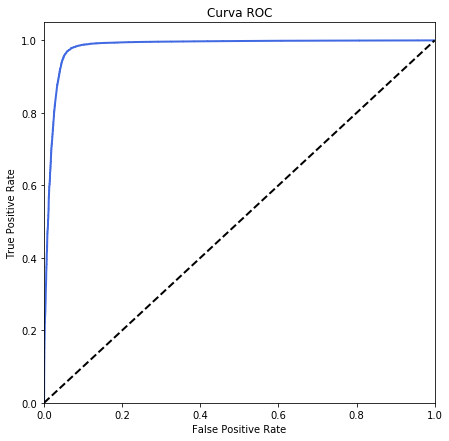

In [0]:
ROC_CURVE(y,p)

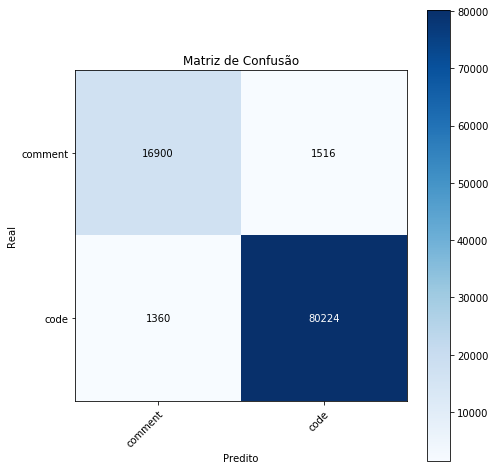

In [33]:
p2 = [1 if pred > 0.6 else 0 for pred in p]
cm = metrics.confusion_matrix(y, p2)

fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['comment','code'], yticklabels=['comment','code'],
       title="Matriz de Confusão",
       ylabel="Real",
       xlabel="Predito")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > cm.max()/2. else "black")
fig.tight_layout()
plt.show()

In [32]:
precision = 80455/(80455+1682)
revoc = 80455/(80455+1129)
acc = (80455+16734)/(16734+1682+1129+80455)
print('Precisão:' + str(precision))
print('Revocação:' + str(revoc))
print('Acurácia:' + str(acc))

Precisão:0.9795220180917248
Revocação:0.9861615022553442
Acurácia:0.97189


In [35]:
precision = 80224/(80224+1516)
revoc = 80224/(80224+1360)
acc = (80224+16900)/(16900+1516+1360+80224)
print('Precisão:' + str(precision))
print('Revocação:' + str(revoc))
print('Acurácia:' + str(acc))

Precisão:0.9814533887937362
Revocação:0.9833300647185723
Acurácia:0.97124
